In [1]:
# imports necessary packages
from maze import dynamic_programming
from maze import draw_maze
from maze import Maze
from maze import animate_solution
from maze import visualize_policy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# defines the maze and starting position
maze = [[0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1, 1, 1], [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 0], [0, 0, 0, 0, 1, 2, 0, 0]]
start = (0,0,6,5)

In [3]:
# creates maze and environment objects
maze = np.array(maze)
env = Maze(maze)

In [4]:
"""Task 1c)"""
# derives policy, simulates the path for dynamic programming and T=20
T = 20
V, policy = dynamic_programming(env, T)
path = env.simulate(start, policy, 'DynProg')

In [ ]:
# animate solution
animate_solution(maze, path)

In [6]:
# checks if there are any differences in player movement in 100 different simulations of the game
path_list = []
path = env.simulate(start, policy, 'DynProg')
for i in range(100):
    path = env.simulate(start, policy, 'DynProg')
    path_list.append(path)
for i in range(100):
    for j in range(T):
        if path_list[i][j][0] != path[j][0] or path_list[i][j][1] != path[j][1]:
            print("Difference spotted!")

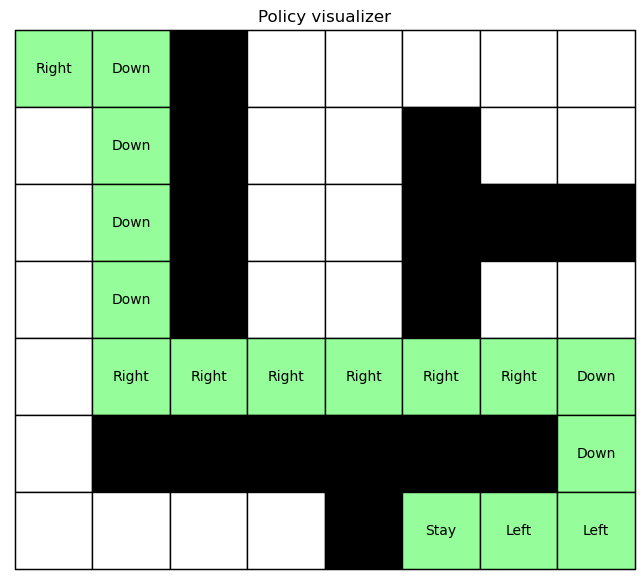

In [5]:
# vizualizes optimal policy 
visualize_policy(maze, path,"c")

# note: the policy is independent of the minotaur movement, therefore we did not include 
# the minotaur in this visualization

In [10]:
"""Task 1d)"""
# derive exit probability for different values for T=1,...,30
# case: minotaur must move
probs = []
runs = 100
for T in range(1,31):
    V, policy = dynamic_programming(env, T)
    count = 0
    for i in range(runs):
        path = env.simulate(start, policy, 'DynProg')
        if (path[-1][0], path[-1][1]) == (6, 5):
            count += 1
    count = count/runs
    probs.append(count)

In [ ]:
# visualize probabilites of having a successful run over T
plt.plot(range(1,31), probs)
plt.title("Success probabilities for always moving minotaur")
plt.xlabel("T")
plt.ylabel("Probability")
plt.show()

In [ ]:
# derive exit probability for different values for T=1,...,30
# case: minotaur can stay

Successful run


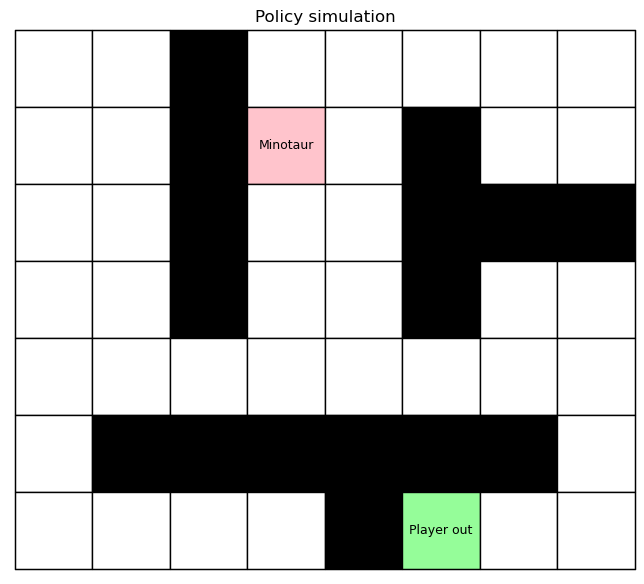

In [63]:
"""Tests"""
# derives policy, simulates the path and animates the solution for dynamic programming and T=20
T = 15
V, policy = dynamic_programming(env, T)
path = env.simulate(start, policy, 'DynProg')
animate_solution(maze, path)
if (path[-1][0], path[-1][1]) == (6, 5):
    print("Successful run")
